In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Reshape, Flatten, Dense
from keras.datasets import mnist

In [5]:
# data
(x_train, _) , (x_test, _ ) = mnist.load_data()

In [6]:
# Normalize
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [8]:
# Reshape as num_samples,28,28,1
x_train = np.reshape(x_train, (len(x_train),28,28,1))
x_test = np.reshape(x_test, (len(x_test),28,28,1))

In [19]:
# add noise
def add_noise(image):
  noise_factor = 0.2
  noisy_images = image + noise_factor * np.random.randn(*image.shape)
  return np.clip(noisy_images, 0., 1.)

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

In [20]:
# Build autoencoder
def build_autoencoder():
  model = Sequential([
      Flatten(input_shape=(28,28,1)),
      Dense(64, activation='relu'), #Encoder
      Dense(28*28, activation='sigmoid'), #Bottleneck
      Reshape((28,28,1))
  ])
  return model

autoencoder=build_autoencoder()

In [21]:
autoencoder.compile(
    loss = 'mean_squared_error',
    optimizer = 'adam'
)

In [22]:
autoencoder.fit(
    x_train_noisy,
    x_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_test_noisy,x_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0738 - val_loss: 0.0231
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0208 - val_loss: 0.0144
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0137 - val_loss: 0.0110
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0082 - val_loss: 0.0076
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0076 - val_loss: 0.0072
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0072 - val_loss: 0.0069
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0069 - val_loss: 0.0067
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0068 - val_loss: 0.0066


In [23]:
denoised_images = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


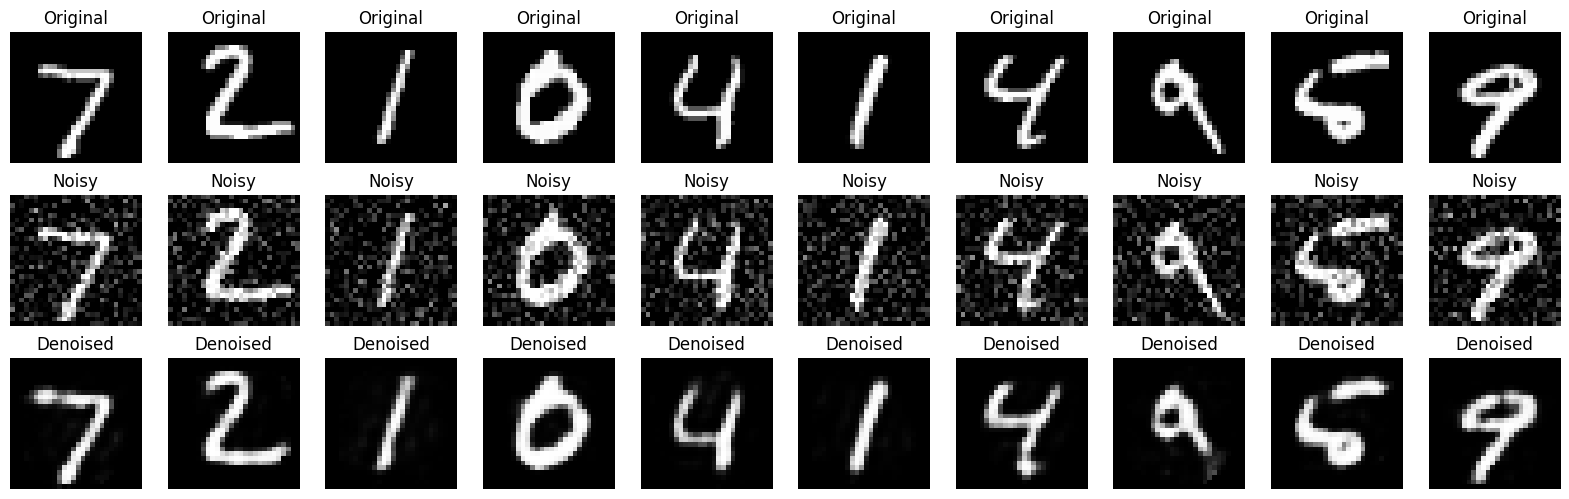

In [24]:
# Visualize
n = 10
plt.figure(figsize=(20,6))
for i in range(n):
  # Original
  ax = plt.subplot(3,n,i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  plt.title('Original')
  plt.axis('off')

  # Noisy
  ax = plt.subplot(3,n,i+1+n)
  plt.imshow(x_test_noisy[i].reshape(28,28), cmap='gray')
  plt.title('Noisy')
  plt.axis('off')

  #Denoised
  ax = plt.subplot(3,n,i+1+2*n)
  plt.imshow(denoised_images[i].reshape(28,28), cmap='gray')
  plt.title('Denoised')
  plt.axis('off')

plt.show()